# Progetto Data Science

Federico Elia 5066337

## Importazione dei pacchetti

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import ast
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

## DATASET

### Carico i dataset

In [230]:
# Lettura dei dataset
disney_titles_1 = pd.read_csv("disney_titles_1.csv")
disney_titles_2 = pd.read_csv("disney_titles_2.csv")
netflix_titles_1 = pd.read_csv("netflix_titles_1.csv")
netflix_titles_2 = pd.read_csv("netflix_titles_2.csv")

### Esaminino la disposizione e il contenuto delle tabelle

In [231]:
print("Info su disney_titles_1: ")
print(disney_titles_1.info())
print("\nInfo su disney_titles_2: ")
print(disney_titles_2.info())
print("\nInfo su netflix_titles_1: ")
print(netflix_titles_1.info())
print("\nInfo su netflix_titles_2: ")
print(netflix_titles_2.info())

Info su disney_titles_1: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1836 non-null   object 
 1   title                 1836 non-null   object 
 2   type                  1836 non-null   object 
 3   description           1827 non-null   object 
 4   release_year          1836 non-null   int64  
 5   age_certification     1394 non-null   object 
 6   runtime               1836 non-null   int64  
 7   genres                1836 non-null   object 
 8   production_countries  1836 non-null   object 
 9   seasons               534 non-null    float64
 10  imdb_id               1364 non-null   object 
 11  imdb_score            1327 non-null   float64
 12  imdb_votes            1316 non-null   float64
 13  tmdb_popularity       1820 non-null   float64
 14  tmdb_score            1702 non-null   float64


## INTEGRAZIONE

Creo una nuova tabella piattaforma_titles_combinata.csv ottenuta a partire
da piattaforma_titles_1.csv alla quale aggiungo le colonne "date_added" e "country" di piattaforma_titles_2.csv utilizzando l’operazione di left JOIN.

In [232]:
# Utilizzo il comando merge per effettuare il JOIN e quindi aggiungere date_added e country
disney_data_da_combinare = disney_titles_2[['title', 'date_added', 'country']]
disney_titles_combinata = pd.merge(disney_titles_1 , disney_data_da_combinare , how = 'left' , on = 'title')
netflix_data_da_combinare = netflix_titles_2[['title', 'date_added', 'country']]
netflix_titles_combinata = pd.merge(netflix_titles_1 , netflix_data_da_combinare , how = 'left' , on = 'title')

print(f"Info su disney_titles_combinata: ")
print(disney_titles_combinata.info())
print(f"\nInfo su netflix_titles_combinata: ")
print(netflix_titles_combinata.info())

Info su disney_titles_combinata: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1836 entries, 0 to 1835
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1836 non-null   object 
 1   title                 1836 non-null   object 
 2   type                  1836 non-null   object 
 3   description           1827 non-null   object 
 4   release_year          1836 non-null   int64  
 5   age_certification     1394 non-null   object 
 6   runtime               1836 non-null   int64  
 7   genres                1836 non-null   object 
 8   production_countries  1836 non-null   object 
 9   seasons               534 non-null    float64
 10  imdb_id               1364 non-null   object 
 11  imdb_score            1327 non-null   float64
 12  imdb_votes            1316 non-null   float64
 13  tmdb_popularity       1820 non-null   float64
 14  tmdb_score            1702 non-null   

Verifico il contenuto di piattaforma_titles_combinata.csv per accertarmi del risultato della JOIN.

In [233]:
print(f"Info su disney_titles_combinata: ")
print(disney_titles_combinata.info())
print(f"\nInfo su netflix_titles_combinata: ")
print(netflix_titles_combinata.info())

Info su disney_titles_combinata: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1836 entries, 0 to 1835
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1836 non-null   object 
 1   title                 1836 non-null   object 
 2   type                  1836 non-null   object 
 3   description           1827 non-null   object 
 4   release_year          1836 non-null   int64  
 5   age_certification     1394 non-null   object 
 6   runtime               1836 non-null   int64  
 7   genres                1836 non-null   object 
 8   production_countries  1836 non-null   object 
 9   seasons               534 non-null    float64
 10  imdb_id               1364 non-null   object 
 11  imdb_score            1327 non-null   float64
 12  imdb_votes            1316 non-null   float64
 13  tmdb_popularity       1820 non-null   float64
 14  tmdb_score            1702 non-null   

###Pulizia dei dati:


1.   Eliminazione di colonne inutili o ripetute
2.   Eliminazione di righe uguali o non significative
3.   Gestione dei valori nulli



Controllo quanti sono i valori nulli.

In [234]:
print(f"\nNumero di valori nulli di disney_titles_combinata:\n{disney_titles_combinata.isnull().sum()}")
print(f"Numero di valori nulli di netflix_titles_combinata:\n{netflix_titles_combinata.isnull().sum()}")
print(f"\nPercentuale di valori nulli rispetto al totale di disney_titles_combinata:\n{disney_titles_combinata.isnull().sum() / disney_titles_combinata.shape[0]}")
print(f"\n\nPercentuale di valori nulli rispetto al totale di netflix_titles_combinata:\n{netflix_titles_combinata.isnull().sum() / netflix_titles_combinata.shape[0]}")


Numero di valori nulli di disney_titles_combinata:
id                         0
title                      0
type                       0
description                9
release_year               0
age_certification        442
runtime                    0
genres                     0
production_countries       0
seasons                 1302
imdb_id                  472
imdb_score               509
imdb_votes               520
tmdb_popularity           16
tmdb_score               134
date_added               772
country                  907
dtype: int64
Numero di valori nulli di netflix_titles_combinata:
id                         0
title                      0
type                       0
description               22
release_year               0
age_certification       2661
runtime                    0
genres                     0
production_countries       0
seasons                 3756
imdb_id                  391
imdb_score               460
imdb_votes               476
tmdb_populari

In [235]:
# Informazione sui valori nulli
null_info_disney = pd.DataFrame(disney_titles_combinata.isnull().sum(), columns=['null_count'])
null_info_netflix = pd.DataFrame(disney_titles_combinata.isnull().sum(), columns=['null_count'])

# Ordinare le colonne
null_info_disney = null_info_disney.sort_values(by='null_count', ascending=False)
null_info_netflix = null_info_netflix.sort_values(by='null_count', ascending=False)

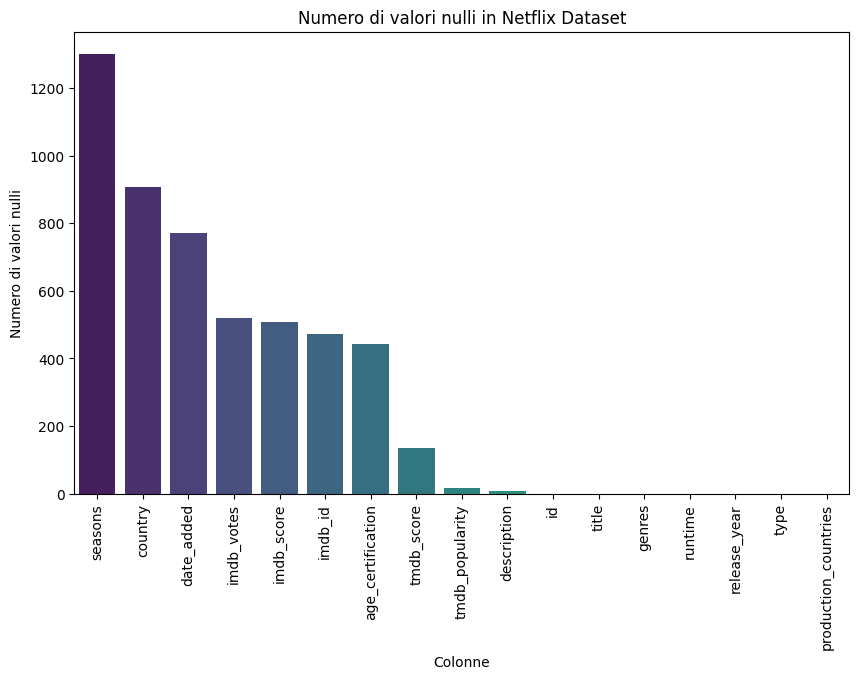

In [236]:
plt.figure(figsize=(10, 6))
sns.barplot(x=null_info_netflix.index, y='null_count', data=null_info_netflix, palette='viridis')
plt.xticks(rotation=90)
plt.title('Numero di valori nulli in Netflix Dataset')
plt.ylabel('Numero di valori nulli')
plt.xlabel('Colonne')
plt.show()

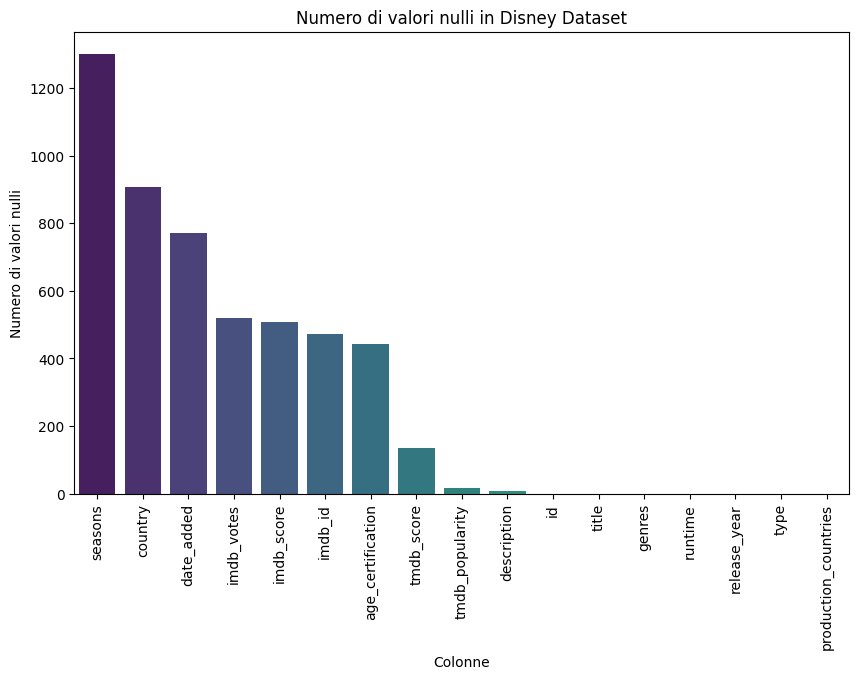

In [237]:
plt.figure(figsize=(10, 6))
sns.barplot(x=null_info_disney.index, y='null_count', data=null_info_disney, palette='viridis')
plt.xticks(rotation=90)
plt.title('Numero di valori nulli in Disney Dataset')
plt.ylabel('Numero di valori nulli')
plt.xlabel('Colonne')
plt.show()

####Eliminazione di colonne inutili o ripetute

Elimino le seguenti colonne:

*   "country" è stata rimossa al fine di eliminare informazioni ridondanti e poiché presentava un numero maggiore di valori null rispetto a "production_countries".
*   "description" è stata rimossa poiché non utile ai fini dell'analisi.
*   "imdb_id" è stata rimossa a causa dell'ampia presenza di valori nulli e per via della sua scarsa rilevanza in relazione all'obiettivo richiesto.
* "imdb_votes" è stata rimossa a causa dell'ampia presenza di valori nulli e per via della sua scarsa rilevanza in relazione all'obiettivo richiesto.
*   "season" è stata rimossa per via della sua scarsa rilevanza in relazione all'obiettivo richiesto (in questo caso l'alto numero di null non è un problema perchè "season" è una colonna sensata solo per le serie tv).

"age_certification" e "imdb_score" presentano un alto numero di null, ma vengono comunque mantenute perchè utili al fine dell'analisi.

In [238]:
netflix_titles_combinata.drop(columns = ['country' , 'description', 'imdb_id', 'imdb_votes', 'seasons'] , inplace = True)
disney_titles_combinata.drop(columns = ['country' , 'description', 'imdb_id', 'imdb_votes','seasons'] , inplace = True)

print(f"Info su disney_titles_combinata dopo l'eliminazione delle colonne: ")
print(disney_titles_combinata.info())
print(f"\nInfo su netflix_titles_combinata dopo l'eliminazione delle colonne: ")
print(netflix_titles_combinata.info())

Info su disney_titles_combinata dopo l'eliminazione delle colonne: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1836 entries, 0 to 1835
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1836 non-null   object 
 1   title                 1836 non-null   object 
 2   type                  1836 non-null   object 
 3   release_year          1836 non-null   int64  
 4   age_certification     1394 non-null   object 
 5   runtime               1836 non-null   int64  
 6   genres                1836 non-null   object 
 7   production_countries  1836 non-null   object 
 8   imdb_score            1327 non-null   float64
 9   tmdb_popularity       1820 non-null   float64
 10  tmdb_score            1702 non-null   float64
 11  date_added            1064 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 186.5+ KB
None

Info su netflix_titles_combinata dopo l'e

####Eliminazione di righe uguali o non significative

Elimino eventuali tuple duplicate.

In [239]:
disney_titles_combinata.drop_duplicates(inplace = True)
netflix_titles_combinata.drop_duplicates(inplace = True)

Elimino le tuple dove "tmdb_score" == null OR "tmdb_popularity" == null. (in quanto la perdita di tuple è trascurabile).

In [240]:
disney_titles_combinata.dropna(subset=['tmdb_score', 'tmdb_popularity'],inplace = True)
netflix_titles_combinata.dropna(subset=['tmdb_score', 'tmdb_popularity'],inplace = True)

Elimino le tuple dove "age_certification" == null AND "imdb_score" == null. (ho deciso di eliminare l'intersezione tra condizioni e non unione al fine di preservare la massima quantità di dati analizzabili).

In [241]:
disney_titles_combinata.dropna(subset=[ "age_certification","imdb_score"], how="all",inplace = True)
netflix_titles_combinata.dropna(subset=["age_certification", "imdb_score"], how="all",inplace = True)

Controllo le percentuali di null dopo le opereazioni effettuate.

In [242]:
print(f"\nPercentuale di valori nulli rispetto al totale di disney_titles_combinata:\n{disney_titles_combinata.isnull().sum() / disney_titles_combinata.shape[0]}")
print(f"\nPercentuale di valori nulli rispetto al totale di netflix_titles_combinata:\n{netflix_titles_combinata.isnull().sum() / netflix_titles_combinata.shape[0]}")


Percentuale di valori nulli rispetto al totale di disney_titles_combinata:
id                      0.000000
title                   0.000000
type                    0.000000
release_year            0.000000
age_certification       0.112583
runtime                 0.000000
genres                  0.000000
production_countries    0.000000
imdb_score              0.160265
tmdb_popularity         0.000000
tmdb_score              0.000000
date_added              0.393377
dtype: float64

Percentuale di valori nulli rispetto al totale di netflix_titles_combinata:
id                      0.000000
title                   0.000000
type                    0.000000
release_year            0.000000
age_certification       0.410016
runtime                 0.000000
genres                  0.000000
production_countries    0.000000
imdb_score              0.028824
tmdb_popularity         0.000000
tmdb_score              0.000000
date_added              0.395965
dtype: float64


Dopo aver completato le operazioni, si evidenzia che il numero di valori nulli presenti in "imdb_score" all'interno di netflix_titles_combinata è basso e quindi trascurabile.
Pertanto, ho preso la decisione di eliminare completamente le tuple dove "imdb_score" == null.

In [243]:
netflix_titles_combinata.dropna(subset=[ "imdb_score"],inplace = True)

In [244]:
print(f"Info su disney_titles_combinata dopo l'eliminazione delle righe: ")
print(disney_titles_combinata.info())
print(f"\nInfo su netflix_titles_combinata dopo l'eliminazione delle righe: ")
print(netflix_titles_combinata.info())

Info su disney_titles_combinata dopo l'eliminazione delle righe: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1510 entries, 0 to 1829
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1510 non-null   object 
 1   title                 1510 non-null   object 
 2   type                  1510 non-null   object 
 3   release_year          1510 non-null   int64  
 4   age_certification     1340 non-null   object 
 5   runtime               1510 non-null   int64  
 6   genres                1510 non-null   object 
 7   production_countries  1510 non-null   object 
 8   imdb_score            1268 non-null   float64
 9   tmdb_popularity       1510 non-null   float64
 10  tmdb_score            1510 non-null   float64
 11  date_added            916 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 153.4+ KB
None

Info su netflix_titles_combinata dopo l'eli

## TRASFORMAZIONE

#### Sostituisco la colonna "date_added" con 2 colonne "year_added" e "month_added"

Converto la colonna "date_added" in formato datetime

In [245]:
disney_titles_combinata['date_added'] = pd.to_datetime(disney_titles_combinata['date_added'], format="%B %d, %Y")
netflix_titles_combinata['date_added'] = pd.to_datetime(netflix_titles_combinata['date_added'], format="%B %d, %Y")

Estraggo l'anno e il mese in colonne separate

In [246]:
disney_titles_combinata['year_added'] = disney_titles_combinata['date_added'].dt.strftime("%Y")
disney_titles_combinata['month_added'] = disney_titles_combinata['date_added'].dt.strftime("%B")

netflix_titles_combinata['year_added'] = netflix_titles_combinata['date_added'].dt.strftime("%Y")
netflix_titles_combinata['month_added'] = netflix_titles_combinata['date_added'].dt.strftime("%B")

Rimuovo la colonna originale "date_added"

In [247]:
disney_titles_combinata.drop('date_added', axis=1, inplace=True)
netflix_titles_combinata.drop('date_added', axis=1, inplace=True)

#### Sostituisco la colonna "genres" con una colonna "genres_number" la quale che conterrà il numero di generi associati

In [248]:
#Funzione che preso un array di "genres" ne restituisce il numero di elementi
def array_gen_len(x):
    return len(x.split(','))

#Con il metodo apply eseguo la funzione array_gen_len su tutta la colonna di genres e ne salvo il valore su genres_number
disney_titles_combinata['genres_number'] = disney_titles_combinata['genres'].apply(array_gen_len)
netflix_titles_combinata['genres_number'] = netflix_titles_combinata['genres'].apply(array_gen_len)

Cancello la colonna "genres"




In [249]:
disney_titles_combinata.drop('genres', axis=1, inplace=True)
netflix_titles_combinata.drop('genres', axis=1, inplace=True)

#### Verifico che le operazioni di trasformazione abbiano prodotto i risultati desiderati.

In [250]:
print(f"Head su disney_titles_combinata dopo aver effettuato le operazioni di trasformazione: ")
print(disney_titles_combinata.head(5))
print(f"\n\nHead su netflix_titles_combinata dopo aver effettuato le operazioni di trasformazione ")
print(netflix_titles_combinata.head(5))

Head su disney_titles_combinata dopo aver effettuato le operazioni di trasformazione: 
        id                                   title   type  release_year  \
0  tm89464                  Miracle on 34th Street  MOVIE          1947   
1  tm61729  The Adventures of Ichabod and Mr. Toad  MOVIE          1950   
2  tm61052                              Cinderella  MOVIE          1950   
3  tm87946                                   Dumbo  MOVIE          1941   
4  tm74391                                Fantasia  MOVIE          1941   

  age_certification  runtime production_countries  imdb_score  \
0                 G       96               ['US']         7.9   
1                 G       68               ['US']         6.9   
2                 G       74               ['US']         7.3   
3                 G       64               ['US']         7.2   
4                 G      119               ['US']         7.7   

   tmdb_popularity  tmdb_score year_added month_added  genres_number  


## ESPLORAZIONE

#### Rappresento la distribuzione dell'imdb_score suddividendo i programmi per "age_certification"

##### Disney

In [251]:
grouping_disney = disney_titles_combinata.groupby(disney_titles_combinata.age_certification)

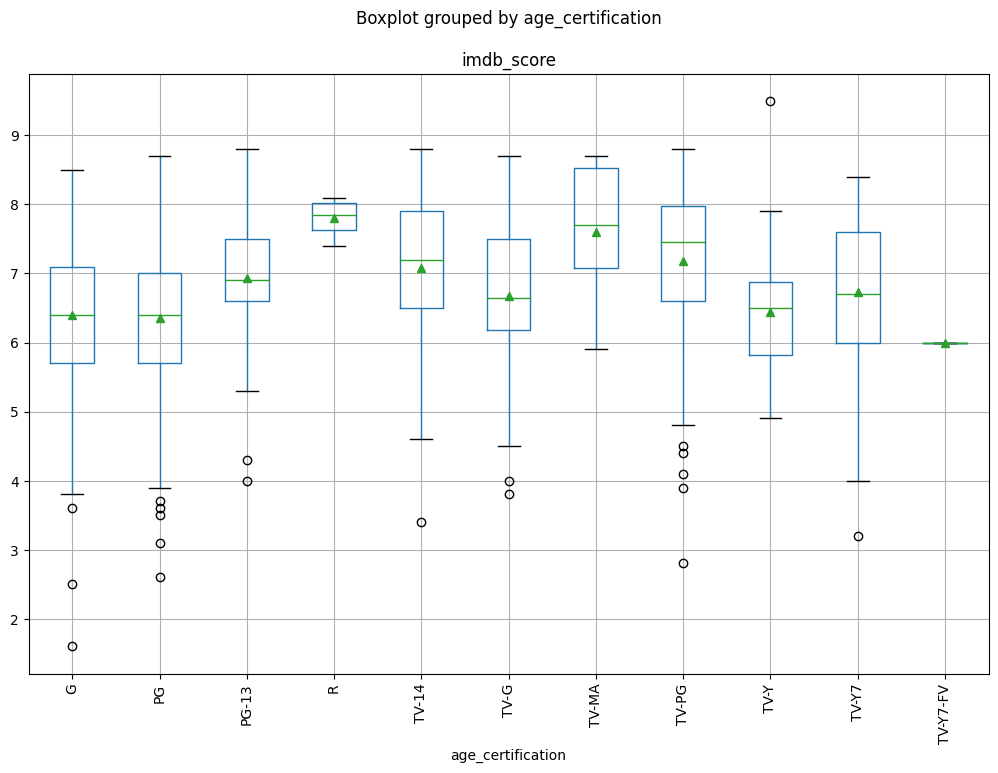

In [252]:
g = pd.DataFrame(grouping_disney.apply(lambda x : x['imdb_score']))
g.boxplot('imdb_score', by='age_certification', figsize=(12, 8), showmeans=True);
plt.xticks(rotation=90);

##### Netflix

In [253]:
grouping_netflix = netflix_titles_combinata.groupby(netflix_titles_combinata.age_certification)

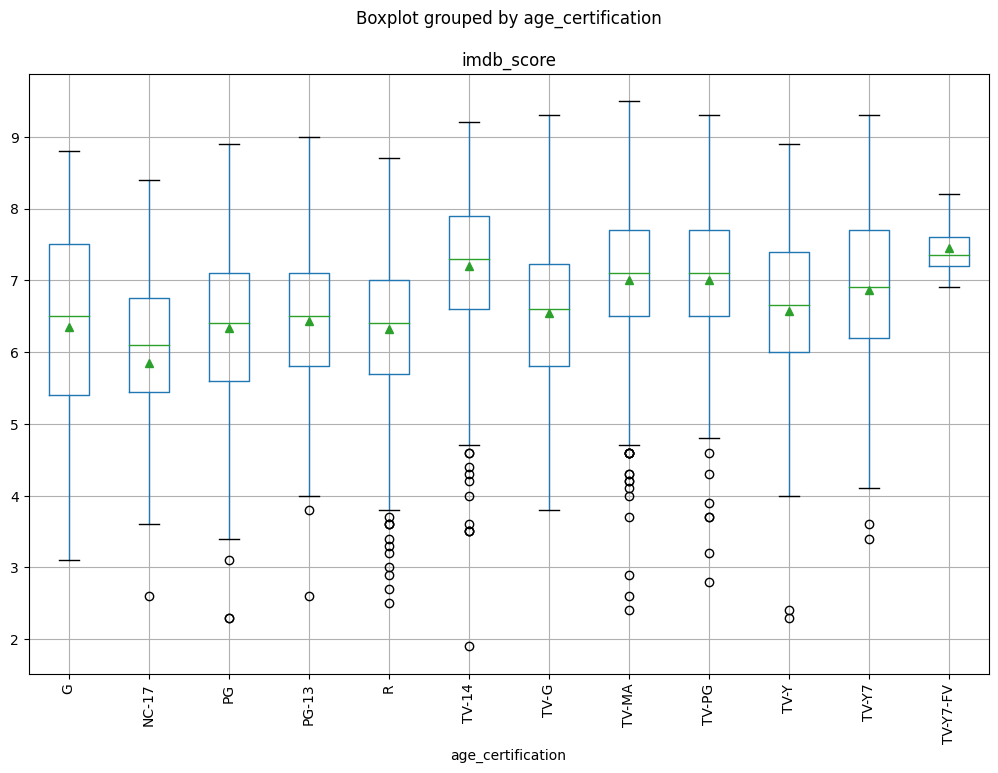

In [254]:
g = pd.DataFrame(grouping_netflix.apply(lambda x : x['imdb_score']))
g.boxplot('imdb_score', by='age_certification', figsize=(12, 8), showmeans=True);
plt.xticks(rotation=90);

#### Rappresento l’informazione su FILM e TV SHOW con il numero di generi a loro associati, ottenuto nella fase di trasformazione.

##### Disney

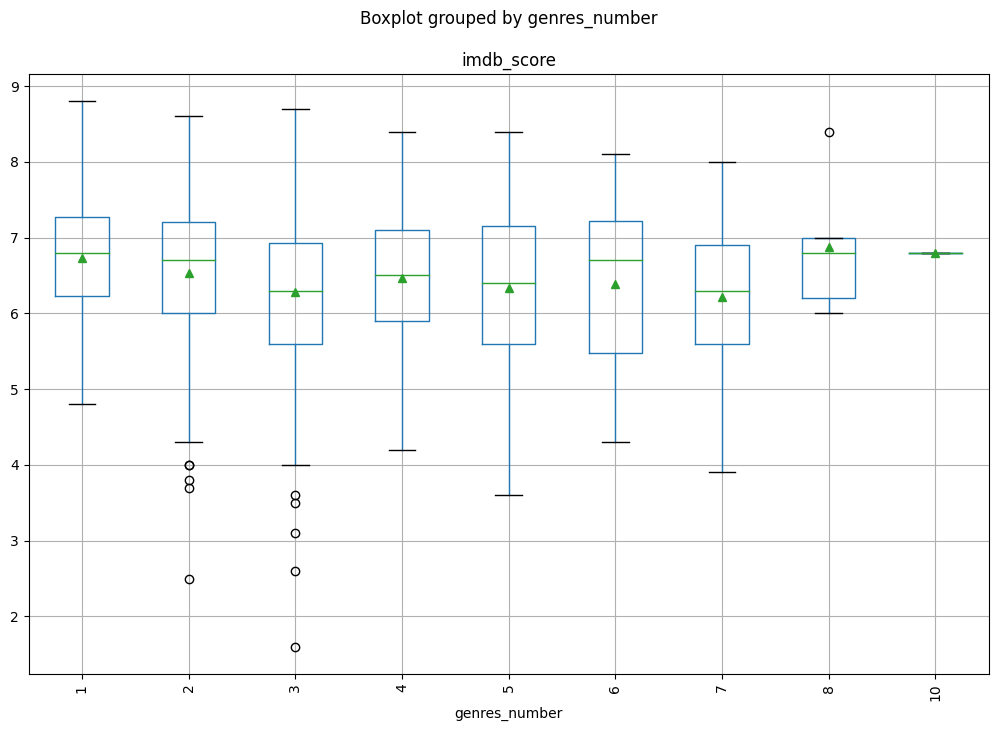

In [255]:
grouping_genres = disney_titles_combinata[disney_titles_combinata['type'] == 'MOVIE'].groupby('genres_number')
g = pd.DataFrame(grouping_genres.apply(lambda x : x['imdb_score']))
g.boxplot('imdb_score', by='genres_number', figsize=(12, 8), showmeans=True);
plt.xticks(rotation=90);

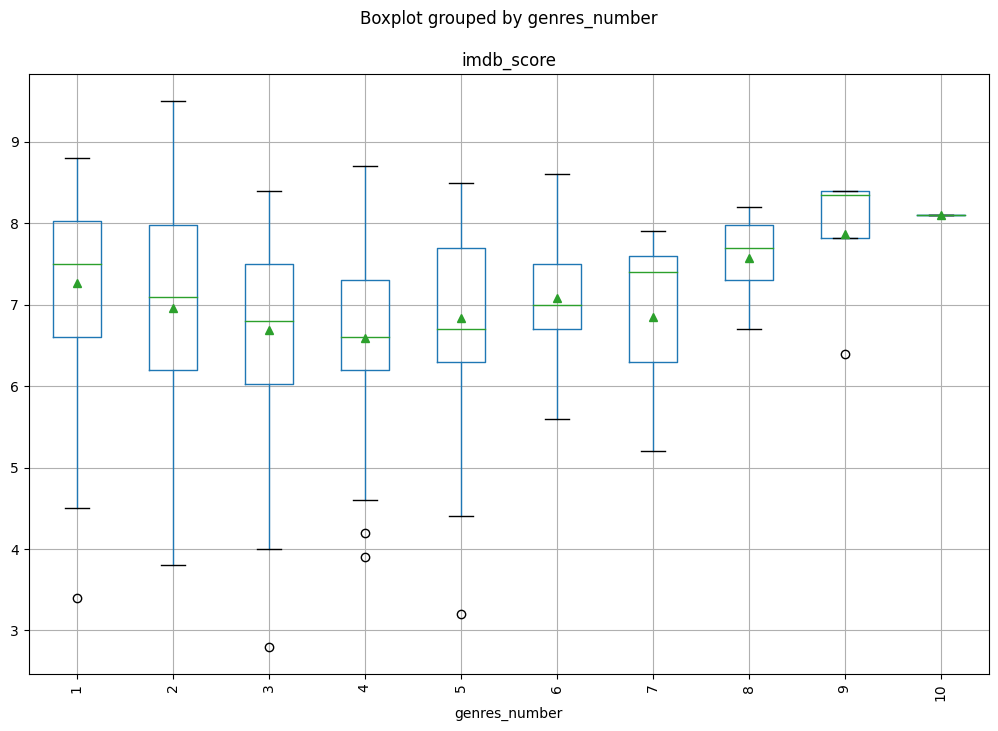

In [256]:
grouping_genres_2 = disney_titles_combinata[disney_titles_combinata['type'] == 'SHOW'].groupby('genres_number')
g = pd.DataFrame(grouping_genres_2.apply(lambda x : x['imdb_score']))
g.boxplot('imdb_score', by='genres_number', figsize=(12, 8), showmeans=True);
plt.xticks(rotation=90);

##### Netflix

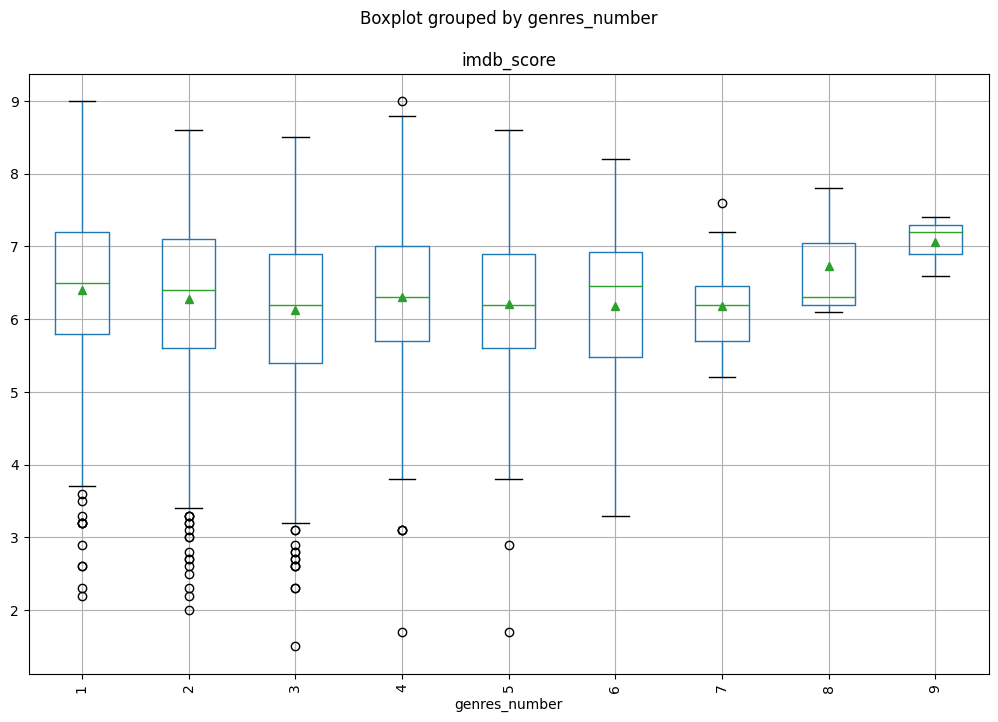

In [257]:
grouping_genres = netflix_titles_combinata[netflix_titles_combinata['type'] == 'MOVIE'].groupby('genres_number')
g = pd.DataFrame(grouping_genres.apply(lambda x : x['imdb_score']))
g.boxplot('imdb_score', by='genres_number', figsize=(12, 8), showmeans=True);
plt.xticks(rotation=90);

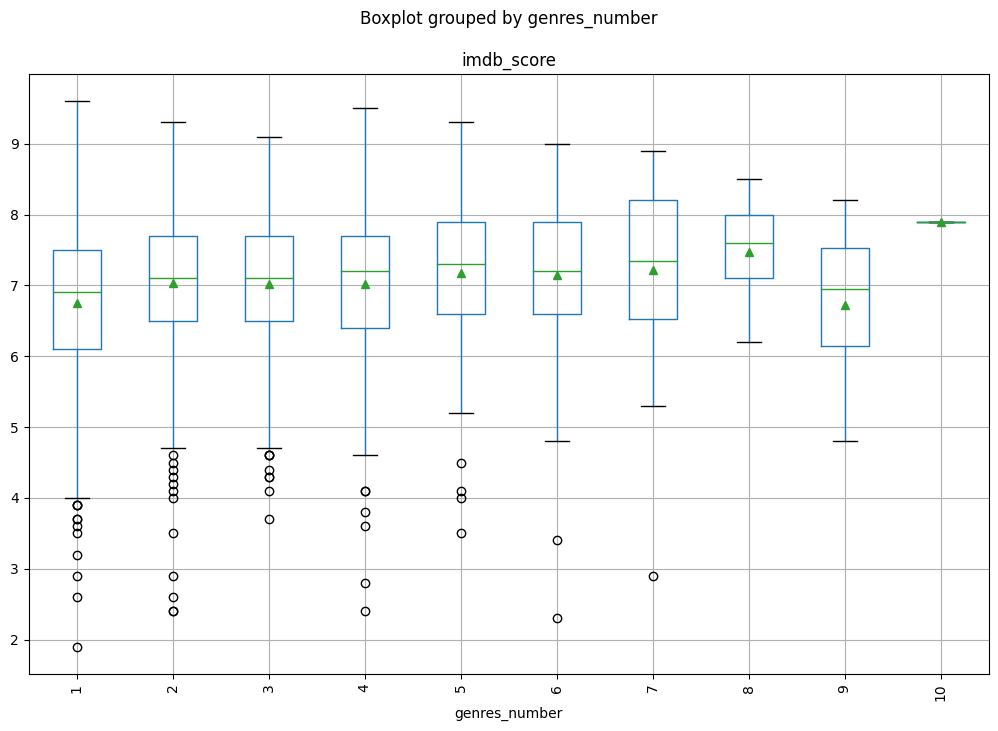

In [258]:
grouping_genres_2 = netflix_titles_combinata[netflix_titles_combinata['type'] == 'SHOW'].groupby('genres_number')
g = pd.DataFrame(grouping_genres_2.apply(lambda x : x['imdb_score']))
g.boxplot('imdb_score', by='genres_number', figsize=(12, 8), showmeans=True);
plt.xticks(rotation=90);

## INTEGRAZIONE BIS

Il numero di tuple dove "imdb_score" == null della tabella disney_titles_combianta è ancora molto alto, in seguito alle osservazioni fatte nella fase di esplorazione e avendo constatato che  non esistono tuple dove "imdb_score" == null AND "age_certification" == null, decido di sostituire i valori "imdb_score" == null con la media del relativo gruppo di "age_certification".

In [259]:
# Calcolo della media di imdb_score per ciascun gruppo di age_certification
media_imdb_per_gruppo = grouping_disney['imdb_score'].mean()

# Itero attraverso le righe del DataFrame e inserisco le medie calcolate nei valori imdb_score null
for index, row in disney_titles_combinata.iterrows():
    # Prendo solo le tuple con imdb_score == null
    if pd.isnull(row['imdb_score']):
        # Salvo in age_certification il valore di della colonna age_certification della attuale tupla
        age_certification = row['age_certification']
        # Inserisco la media calcolata nel valore imdb_score nullo
        disney_titles_combinata.at[index, 'imdb_score'] = media_imdb_per_gruppo[age_certification]

Controllo quanti sono i valori nulli.

In [260]:
print(f"Percentuale di valori nulli rispetto al totale di disney_titles_combinata:\n{disney_titles_combinata.isnull().sum() / disney_titles_combinata.shape[0]}")

Percentuale di valori nulli rispetto al totale di disney_titles_combinata:
id                      0.000000
title                   0.000000
type                    0.000000
release_year            0.000000
age_certification       0.112583
runtime                 0.000000
production_countries    0.000000
imdb_score              0.000000
tmdb_popularity         0.000000
tmdb_score              0.000000
year_added              0.393377
month_added             0.393377
genres_number           0.000000
dtype: float64


Creo una tabella combinata tra Netflix e Disney, che sarà utile per le future operazioni.

In [261]:
netflix_disney_titles = pd.concat([netflix_titles_combinata, disney_titles_combinata])

## TEST STATISTICO

Verifico con un test statistico se ci siano differenze significative tra la distribuzione di FILM suddivisi per mese tenendo separate i dati delle due piattaforme. Ripetendo lo stesso sul tipo
TV SHOW. Infine, eseguo un unico test sull’intero insieme di dati.

Al fine di verificare statisticamente se esistono differenze nella distribuzione dei contenuti nelle due piattaforme, si può utilizzare il t-test per campioni indipendenti.

Il t-test confronta se le medie di due gruppi sono uguali o meno.

\begin{cases}
H_0 : \mu_A = \mu_B  \\
H_1 : \mu_A \neq \mu_B
\end{cases}

Una volta effettuato la statistica test, si calcola il relativo p-value e si effettua la regola decisionale, stabilendo un valore $\alpha : 0,05$.

Se il p-value è maggiore di $\alpha$ ---> Si accetta l'ipotesti nulla \\
Se il p-value è minore di $\alpha$   ---> Si rifiuta l'ipotesti nulla

#### Confronto la distribuzione dei film suddivisi per mese tra le due piattaforme

Ipotesi da verificare:
*   H0: la distribuzione dei film suddivisi per mese è uguale tra le due piattaforme.
*   H1: la distribuzione dei film suddivisi per mese è diversa tra le due piattaforme.

In [262]:
# Si selezionano solo i film per le 2 piattaforme
film_disney = disney_titles_combinata[disney_titles_combinata['type'] == 'MOVIE']
film_netflix = netflix_titles_combinata[netflix_titles_combinata['type'] == 'MOVIE']

In [263]:
# Si contano il numero di film per mese
numbero_film_disney_per_mese = film_disney['month_added'].value_counts().sort_index()
numbero_film_netflix_per_mese = film_netflix['month_added'].value_counts().sort_index()

In [264]:
t_test , p_value = stats.ttest_ind(numbero_film_netflix_per_mese , numbero_film_disney_per_mese)

In [265]:
# Regola decisionale del p-value
alpha = 0.05
if p_value < alpha:
    print("Rifiuto l'ipotesi nulla: I dati mostrano evidenza tale da rifiutare l'ipotesi di uguaglianza tra le medie di gruppo, la distribuzione di film per mese è diversa tra le due piattaforme")
else:
    print("Accetto l'ipotesi nulla: I dati non mostrano una evidenza tale da rifiutare l'ipotesi di uguaglianza tra le medie di gruppo, la distribuzione di film  è uguale tra le due piattaforme.")


Rifiuto l'ipotesi nulla: I dati mostrano evidenza tale da rifiutare l'ipotesi di uguaglianza tra le medie di gruppo, la distribuzione di film per mese è diversa tra le due piattaforme


#### Confronto la distribuzione dei tv-show suddivisi per mese tra le due piattaforme

*   H0: la distribuzione dei tv-show suddivisi per mese è uguale tra le due piattaforme.
*   H1: la distribuzione dei tv-show suddivisi per mese è diversa tra le due piattaforme.

In [266]:
# Faccio la stessa cosa con i TV_show
TV_show_disney = disney_titles_combinata[disney_titles_combinata['type'] == 'SHOW']
TV_show_netflix = netflix_titles_combinata[netflix_titles_combinata['type'] == 'SHOW']

In [267]:
# Si contano il numero di tv-show per mese
numbero_tv_show_disney_per_mese = TV_show_disney['month_added'].value_counts().sort_index()
numbero_tv_show_netflix_per_mese = TV_show_netflix['month_added'].value_counts().sort_index()

In [268]:
t_test_2 , p_value_2 = stats.ttest_ind(numbero_tv_show_netflix_per_mese , numbero_tv_show_disney_per_mese)

In [269]:
# Regola decisionale del p-value
if p_value_2 < alpha:
    print("Rifiuto l'ipotesi nulla: I dati mostrano evidenza tale da rifiutare l'ipotesi di uguaglianza tra le medie di gruppo, la distribuzione dei tv-show per mese è diversa tra le due piattaforme")
else:
    print("Accetto l'ipotesi nulla: I dati non mostrano una evidenza tale da rifiutare l'ipotesi di uguaglianza tra le medie di gruppo, la distribuzione di tv-show  è uguale tra le due piattaforme.")


Rifiuto l'ipotesi nulla: I dati mostrano evidenza tale da rifiutare l'ipotesi di uguaglianza tra le medie di gruppo, la distribuzione dei tv-show per mese è diversa tra le due piattaforme


#### Confronto i dati delle due piattaforme combinate per verificare se c'è una differenza nella distribuzione mensile tra i film e le tv-show

 Ora si effutta il t-test aggregando i dati delle due piattaforme e testando se la distribuzione, suddivisa per mese, dei film è diversa da quella dei tv-show.


* H0: la distribuzione mensile dei film è uguale alla a distribuzione mensile dei tv-show.

* H1: la distribuzione mensile dei film è diversa alla a distribuzione mensile dei tv-show.




In [270]:
FILM = netflix_disney_titles[netflix_disney_titles['type'] == 'MOVIE']
TV_SHOW = netflix_disney_titles[netflix_disney_titles['type'] == 'SHOW']

In [271]:
# Si contano il numero di tv-show per mese
FILM_per_mese = FILM['month_added'].value_counts().sort_index()
TV_Show_per_mese = TV_SHOW['month_added'].value_counts().sort_index()

In [272]:
t_test_3 , p_value_3 = stats.ttest_ind(numbero_tv_show_netflix_per_mese , numbero_tv_show_disney_per_mese)

In [273]:
# Regola decisionale del p-value
if p_value_3 < alpha:
    print("Rifiuto l'ipotesi nulla: I dati mostrano evidenza tale da rifiutare l'ipotesi di uguaglianza tra le medie di gruppo, la distribuzione dei tv-show per mese è diversa da quella dei film")
else:
    print("Accetto l'ipotesi nulla: I dati non mostrano una evidenza tale da rifiutare l'ipotesi di uguaglianza tra le medie di gruppo, la distribuzione di tv-show  è uguale a quella dei film.")


Rifiuto l'ipotesi nulla: I dati mostrano evidenza tale da rifiutare l'ipotesi di uguaglianza tra le medie di gruppo, la distribuzione dei tv-show per mese è diversa da quella dei film


## OLAP

Costruire una rappresentazione OLAP che conteggi i dati nelle due piattaforme raggruppando per

 • Mese di produzione \\
 • Tipologia (TV SHOW o FILM) \\
 • Paese di produzione

#### SLICING

In [274]:
tipologia = list(set(netflix_disney_titles['type']))
mesi = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Essendo 'production_countries' formato da liste contenenti più paesi
# Eseguo il seguente codice per creare una lista unica formata dai paesi che compaiono
paesi = []
for p in netflix_disney_titles['production_countries']:
  x = ast.literal_eval(p)
  for j in x:
    if j not in paesi:
      paesi.append(j)

print(paesi)

['US', 'GB', 'EG', 'IN', 'DE', 'SU', 'DZ', 'LB', 'CA', 'FR', 'JP', 'AR', 'AU', 'GH', 'BF', 'ET', 'HK', 'CN', 'MX', 'ES', 'PS', 'BE', 'IT', 'NO', 'CZ', 'IE', 'DK', 'HU', 'CO', 'NZ', 'TW', 'KR', 'NG', 'RU', 'KW', 'NL', 'SE', 'PH', 'TR', 'CH', 'MY', 'ZA', 'RW', 'AT', 'MA', 'KE', 'SG', 'ID', 'CL', 'SA', 'BR', 'AE', 'PL', 'IS', 'IL', 'FI', 'CD', 'RO', 'CY', 'TH', 'BG', 'UA', 'QA', 'IR', 'JO', 'GL', 'VE', 'BY', 'VN', 'TN', 'IQ', 'AL', 'KH', 'CU', 'PR', 'RS', 'UY', 'PE', 'LU', 'PK', 'PY', 'BD', 'TZ', 'NP', 'CM', 'MC', 'SN', 'MW', 'SY', 'LK', 'AO', 'PT', 'GT', 'MU', 'ZW', 'GR', 'EE', 'AF', 'DO', 'PA', 'IO', 'SK', 'SI', 'UG', 'CI', 'KI']


Avendo osservato che il numero totale di paesi contenuti dentro 'paese' è molto alto, ho optato per la creazione di un dizionario denominato 'paese_occorrenze' allo scopo di registrare quante volte ciascun paese compare, al fine di identificare e selezionare solamente quelli con un almeno 100 occorrenze.

In [275]:
paese_occorrenze = dict()
for p in netflix_disney_titles['production_countries']:
  x = ast.literal_eval(p)
  for j in x:
    if j not in paese_occorrenze:
      paese_occorrenze[j] = 1
    else:
      paese_occorrenze[j] += 1

paesi_almeno_100_occorrenze = []
for paese, occorrenze in paese_occorrenze.items():
    if occorrenze > 100:
        paesi_almeno_100_occorrenze.append(paese)

print(paesi_almeno_100_occorrenze)

['US', 'GB', 'IN', 'DE', 'CA', 'FR', 'JP', 'CN', 'MX', 'ES', 'KR', 'BR']


Ho creato una matrice multidimensionale chiamata "OLAP" e l'ho poi popolata  con i dati aggregati relativi a diverse tipologie di dati, mesi e paesi.

In [276]:
OLAP = np.zeros((len(paesi_almeno_100_occorrenze), len(mesi), len(tipologia)), dtype = "int32")

for k in range(0, len(tipologia)):
    for j in range(0, len(mesi)):
        for i in range(0, len(paesi_almeno_100_occorrenze)):
            OLAP[i, j, k] = np.sum((netflix_disney_titles["type"] == tipologia[k]) &
                                   (netflix_disney_titles['month_added'] == mesi[j]) &
                                   (netflix_disney_titles['production_countries'].str.contains(paesi_almeno_100_occorrenze[i])))

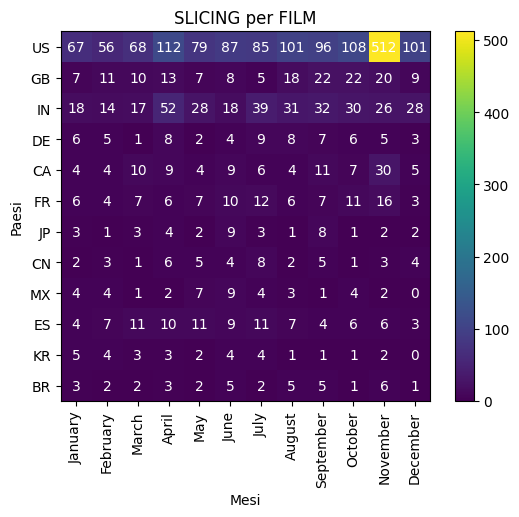

In [277]:
plt.figure()
# Mostra un'immagine basata su una slice della matrice OLAP
plt.imshow(OLAP[..., 1])
plt.title("SLICING per FILM")
plt.xlabel("Mesi")
plt.ylabel("Paesi")
my_xticks = mesi
my_yticks = paesi_almeno_100_occorrenze
plt.xticks(np.arange(0,len(mesi)), my_xticks , rotation = 90)
plt.yticks(np.arange(0,len(paesi_almeno_100_occorrenze)), my_yticks)

for i in range(len(paesi_almeno_100_occorrenze)):
    for j in range(len(mesi)):
        plt.text(j, i, str(OLAP[i, j, 1]), ha='center', va='center', color='w')

plt.colorbar()

## METODI PREDITTIVI

Creo un insieme di attributi composto dai seguenti elementi: \\
• imdb_score \\
• tmdbs_score \\
• tmdbs_popularity \\
• runtime \\

Questo insieme di attributi viene utilizzato come input per un algoritmo di apprendimento supervisionato al fine di effettuare previsioni sulla colonna 'type', che rappresenta la categoria, la quale può essere 'FILM' o 'TV SHOW'.

In questa specifica situazione, impiego i dati della prima piattaforma come set di addestramento, mentre utilizzo i dati della seconda piattaforma come set di test.

Per stimare la varibile target $Y = $ "type" {1 : FILM , 0 :TV_SHOW} utilizziamo un modello logistico usando come descrittori le varibili sopra citate denominate X's.
Si vuole stimare:


\begin{equation}
P(Y = 1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_{imdb\_score} + \beta_2 X_{tmdbs\_score}  +  \beta_3 X_{tmdbs\_popularity}   +   \beta_4 X_{runtime})}}
\end{equation}


In [278]:
X_train = netflix_titles_combinata[['imdb_score', 'tmdb_score', 'tmdb_popularity', 'runtime']]
target = netflix_titles_combinata['type']

In [279]:
# Trainare il modello
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, target)

LogisticRegression(random_state=16)

In [280]:
X_test = disney_titles_combinata[['imdb_score', 'tmdb_score', 'tmdb_popularity', 'runtime']]
y_test = disney_titles_combinata['type']

In [281]:
y_pred = logreg.predict(X_test)

In [282]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 427.9555555555555, 'Classi previste')

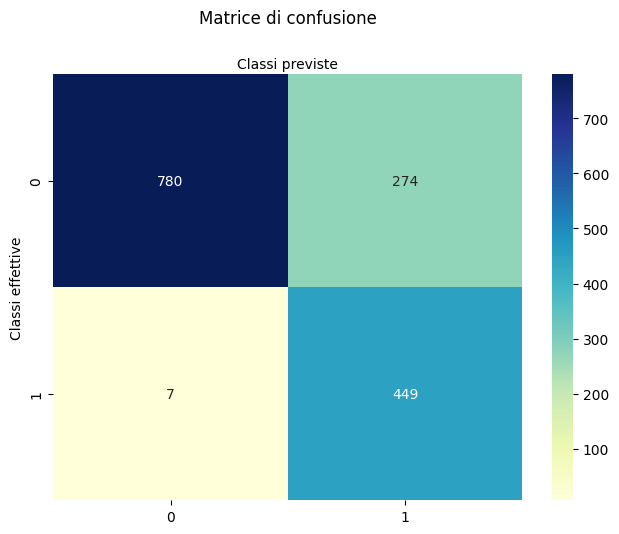

In [283]:
class_names=["Movie","TV_show"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice di confusione', y=1.1)
plt.ylabel('Classi effettive')
plt.xlabel('Classi previste')

In [284]:
accuratezza = metrics.accuracy_score(y_test, y_pred)
print(f"Accuratezza : {accuratezza}")

Accuratezza : 0.813907284768212
